## 什麼是過度擬合 (overfitting) 
> 訓練⼀個模型時，使⽤過多參數，導致在訓練集上表現極佳，但⾯對驗證/測試集時，會有更⾼的錯誤率。
- 訓練集的損失下降的遠比驗證集的損失還來的快
- 驗證集的損失隨訓練時間增長，反⽽上升

<img src="imgs/keras09_overfit2.png" width="100%">
<img src="imgs/keras09_overfit1.png" width="70%">
<img src="imgs/keras09_overfit.png" width="80%">

## 如何減少Overfitting的發生
- 使⽤ K-fold cross validation，找到⼀組參數可以在多組不同的 validation 上得到相似的結果
- 使⽤更多的訓練資料
- 減少 Features (參數) 的使⽤量，避免參數比潛在組合更多的狀況發⽣，以免模型靠硬記就可以得到結果
- 在模型訓練的過程中加入正則化參數 (Regularization)

## 延伸閱讀
[Solving the problem of overfitting](https://www.coursera.org/learn/machine-learning/lecture/4BHEy/regularized-logistic-regression)

[The Problem of Overfitting, Cost Function, Regularized Linear Regression, Regularized Logistic Regression](https://medium.com/@ken90242/machine-learning%E5%AD%B8%E7%BF%92%E6%97%A5%E8%A8%98-coursera%E7%AF%87-week-3-4-the-c05b8ba3b36f)



## 範例重點
* 學會從 Keras 內建函式取得資料
* 能夠建立簡易的深度學習模型
* 觀察並了解 Overfit 現象

In [6]:
import os
from tensorflow import keras

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [7]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [14]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [15]:
# 建立一個有三層隱藏層之神經網路
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 訓練模型並檢視驗證集的結果
model.fit(x_train, y_train, 
          epochs=100, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 9s 180us/sample - loss: 1.9593 - accuracy: 0.2966 - val_loss: 1.8328 - val_accuracy: 0.3339
Epoch 2/100
50000/50000 [==============================] - 8s 170us/sample - loss: 1.7291 - accuracy: 0.3829 - val_loss: 1.7029 - val_accuracy: 0.3929
Epoch 3/100
50000/50000 [==============================] - 9s 178us/sample - loss: 1.6351 - accuracy: 0.4191 - val_loss: 1.6113 - val_accuracy: 0.4313
Epoch 4/100
50000/50000 [==============================] - 9s 178us/sample - loss: 1.5734 - accuracy: 0.4401 - val_loss: 1.5920 - val_accuracy: 0.4379
Epoch 5/100
50000/50000 [==============================] - 8s 151us/sample - loss: 1.5219 - accuracy: 0.4582 - val_loss: 1.5108 - val_accuracy: 0.4595
Epoch 6/100
50000/50000 [==============================] - 8s 151us/sample - loss: 1.4801 - accuracy: 0.4706 - val_loss: 1.4968 - val_accuracy: 0.4599
Epoch 7/100
50000/50000 [===================

50000/50000 [==============================] - 8s 152us/sample - loss: 0.6190 - accuracy: 0.7770 - val_loss: 1.8286 - val_accuracy: 0.5132
Epoch 55/100
50000/50000 [==============================] - 8s 156us/sample - loss: 0.6300 - accuracy: 0.7748 - val_loss: 1.8245 - val_accuracy: 0.5198
Epoch 56/100
50000/50000 [==============================] - 8s 158us/sample - loss: 0.6229 - accuracy: 0.7766 - val_loss: 1.8756 - val_accuracy: 0.5160
Epoch 57/100
50000/50000 [==============================] - 7s 149us/sample - loss: 0.6035 - accuracy: 0.7839 - val_loss: 1.8790 - val_accuracy: 0.5057
Epoch 58/100
50000/50000 [==============================] - 8s 152us/sample - loss: 0.5918 - accuracy: 0.7884 - val_loss: 1.8740 - val_accuracy: 0.5153
Epoch 59/100
50000/50000 [==============================] - 8s 153us/sample - loss: 0.5827 - accuracy: 0.7913 - val_loss: 1.9908 - val_accuracy: 0.4943
Epoch 60/100
50000/50000 [==============================] - 8s 150us/sample - loss: 0.5718 - accuracy

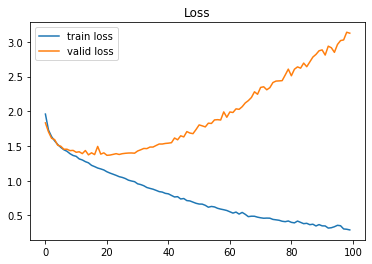

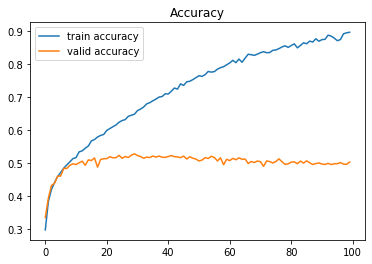

In [19]:
# 以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

### 將 Optimizer 換成 SGD

<img src="imgs/keras09_SGD.png">
<img src="imgs/keras09_SGD1.png">

## 訓練神經網絡前的注意事項

### 訓練前的檢查
- 使⽤的裝置：是使⽤ CPU or GPU / 想要使⽤的 GPU 是否已經被別⼈佔⽤?
> nvidia-smi 可以看到⽬前可以取得的GPU 裝置使⽤狀態
> [Windows下查看GPU(NVIDIA)使用情况](https://blog.csdn.net/idwtwt/article/details/78017565)
- Inputp reprocessing：資料 (Xs) 是否有進⾏過適當的標準化? 
- Output preprocessing：⽬標 (Ys) 是否經過適當的處理?(如 onehotencoded)
> 透過 Function 進⾏處理，⽽非在 Cell 中單獨進⾏避免遺漏、錯置
- Model Graph：模型的架構是否如預期所想?
> model.summary() 可以看到模型堆疊的架構
- 超參數設定(Hyperparameters)：訓練模型的相關參數是否設定得當?
> 將模型/程式所使⽤到的相關參數集中管理，避免散落在各處

In [2]:
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y 

In [1]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 512, 256, 256, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    model.summary()
    return model

In [3]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256

In [4]:
import os
from tensorflow import keras
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()
## 資料前處理
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)
model = build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               16512 

50000/50000 [==============================] - 11s 218us/sample - loss: 0.4517 - accuracy: 0.8359 - val_loss: 2.3733 - val_accuracy: 0.5085
Epoch 46/50
50000/50000 [==============================] - 10s 200us/sample - loss: 0.4229 - accuracy: 0.8467 - val_loss: 2.4884 - val_accuracy: 0.4881
Epoch 47/50
50000/50000 [==============================] - 10s 202us/sample - loss: 0.4189 - accuracy: 0.8485 - val_loss: 2.4795 - val_accuracy: 0.5058
Epoch 48/50
50000/50000 [==============================] - 10s 203us/sample - loss: 0.4117 - accuracy: 0.8499 - val_loss: 2.6366 - val_accuracy: 0.5073
Epoch 49/50
50000/50000 [==============================] - 10s 203us/sample - loss: 0.3834 - accuracy: 0.8624 - val_loss: 2.5733 - val_accuracy: 0.4975
Epoch 50/50
50000/50000 [==============================] - 10s 204us/sample - loss: 0.3707 - accuracy: 0.8664 - val_loss: 2.7753 - val_accuracy: 0.4949


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

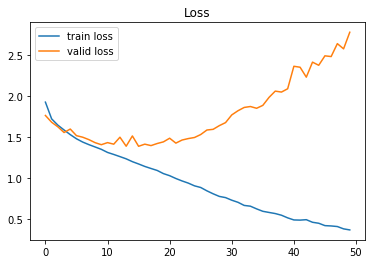

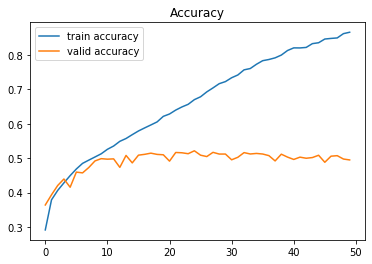

In [5]:
# 訓練模型並檢視驗證集的結果
import matplotlib.pyplot as plt

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()